In [37]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import calendar
from scipy.stats import chi2_contingency
from tabulate import tabulate
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sys
import os
os.chdir(sys.path[3])
import pickle
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
# these are here in case you are interested to run the code with the current prep file
ready_for_analysis_path = 'data/process/recovery_analysis.csv'
same_diff_analysis_path = 'data/process/same_diff.csv'
dic_recover= {0:'not_recover',1:'recover'}
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
raw_data = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()
raw_data.columns

Index(['index', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Introduction', 'Q1', 'Q2', 'Q3',
       'Q3_6_TEXT', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q8_9_TEXT', 'Q9',
       'Q9_11_TEXT', 'Q10', 'Q11', 'Q11_4_TEXT', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q16_1_TEXT', 'Q17', 'Q18', 'Q19', 'Q19_6_TEXT', 'Q20',
       'Q20_4_TEXT', 'Q21', 'Q22', 'Q22_1_TEXT', 'Q23', 'Q23_15_TEXT', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q32_10_TEXT', 'Q33', 'Q33_9_TEXT', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q39_10_TEXT', 'Q40', 'Q40_3_TEXT'],
      dtype='object')

In [17]:
# Just for presentation
vv = pd.read_csv(r'data/process/new_data.csv', skiprows=[2]).reset_index()
vv

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q33_9_TEXT,Q34,Q35,Q36,Q37,Q38,Q39,Q39_10_TEXT,Q40,Q40_3_TEXT
0,0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,...,What were the main reasons you cycled more oft...,In what year were you born?,What is your gender?,What is your annual household income after taxes?,How many bicycles do you currently own?,What is the highest level of education you hav...,What do you consider your main ethnic origin o...,What do you consider your main ethnic origin o...,Where did you hear about this survey? - Select...,Where did you hear about this survey? - Other ...
1,1,4/21/2022 14:05,4/21/2022 14:10,IP Address,169.231.161.135,100,318,TRUE,4/21/2022 14:10,R_sRQ635z5e2hc1t7,...,NaN,1996,Woman,"$200,000 or more per year",One,"Graduate degree (e.g., Master’s, Professional ...","European (e.g., British Isles, German, French,...",NaN,Email,NaN
2,2,4/14/2022 17:28,4/14/2022 17:41,IP Address,128.111.106.41,22,770,FALSE,4/21/2022 17:41,R_21uo7CnrNd8VNIx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4/21/2022 19:27,4/21/2022 19:31,IP Address,70.77.83.154,100,229,TRUE,4/21/2022 19:31,R_7V5ufQv2WtbkiSR,...,NaN,1973,Man,I prefer to not answer,Three,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN
4,4,4/14/2022 19:04,4/14/2022 20:18,IP Address,70.185.131.128,22,4454,FALSE,4/21/2022 20:18,R_qPdUVtdN6wMTtIt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2021,6/6/2022 22:07,6/6/2022 22:14,IP Address,47.146.75.18,100,423,TRUE,6/6/2022 22:14,R_3fYRblhWSYPWCj8,...,NaN,1970,Woman,"Between $100,000 and $149,999 per year",Three,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN
2022,2022,5/24/2022 12:17,5/24/2022 12:20,IP Address,174.90.223.242,69,191,FALSE,6/7/2022 12:20,R_3O7a8xS7l3i8EZG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,2023,6/8/2022 3:19,6/8/2022 3:30,IP Address,108.211.181.111,100,697,TRUE,6/8/2022 3:30,R_3gO85Ni57rH0pTr,...,NaN,NaN,Prefer not to say,I prefer to not answer,I prefer to not answer,"Graduate degree (e.g., Master’s, Professional ...",I prefer to not answer,NaN,Other (please specify):,acquientance
2024,2024,5/25/2022 13:39,5/25/2022 13:39,IP Address,50.205.153.166,2,12,FALSE,6/8/2022 13:39,R_1jwTkRmNyNow9Tz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The questions we are going to use for the following model are stored in the cols variable. Q8 (What type of lock did you use to secure your bicycle? - Selected Choice) has been removed since it includes 951 Nun Values (that means 47% of participants didn't answer that question). The rest of the filtered questions have been removed since I thought they were irrelevant.

In [39]:
cols = ['index', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17']

In [81]:
raw_features = raw_data[cols]
len(raw_features)

2025

The code discards participants who answer more than three null questions

In [82]:
filtered_nun = raw_features[raw_features.count(axis=1) > 3]
len(filtered_nun)

1866

Below is a table showing the questions grouped by the same answer number

In [27]:
for col in cols[1:]:
    print(filtered_nun.groupby(by=col, dropna=False).count()['index'])


Q2
A major bicycle part necessary for riding (i.e., saddle, wheel, pedal, or handlebar)      25
Entire bicycle (i.e., frame and components)                                             1826
NaN                                                                                       15
Name: index, dtype: int64
Q4
2017                    45
2018                    54
2019                   262
2020                   325
2021                   695
2022                   159
Don’t know/not sure      7
NaN                    319
Name: index, dtype: int64
Q5
April                  163
August                 145
December                85
Don’t know/not sure    131
February                88
January                 97
July                   137
June                   281
March                  116
May                    264
November                94
October                127
September              134
NaN                      4
Name: index, dtype: int64
Q6
Afternoon (12:00-17:59)    362
Don’t 

### Missing Values

First, a table is created, sorted from the question with the least NuNs to the question with the most NuNs

In [28]:
temp_dic = {'col_q': [], 'nun_count': []}
for col in cols[1:]:
    temp_groupby = filtered_nun.groupby(by=col, dropna=False).count()['index']
    temp_dic['col_q'].append(temp_groupby.index.name)
    temp_dic['nun_count'].append(temp_groupby[[np.nan]][0])
df_col_q_nun_count = DataFrame(temp_dic)
what_to_deal_first = df_col_q_nun_count.sort_values(by='nun_count')
what_to_deal_first

,col_q,nun_count
2,Q5,4
4,Q7,8
3,Q6,11
0,Q2,15
9,Q13,26
5,Q9,28
6,Q10,28
7,Q11,28
8,Q12,29
12,Q17,42


Encode the answers to the questions

In [40]:
encode_str = "encode_"
cols_encode = {col: encode_str + col for col in cols[1:]}

 Some columns should have manual encoding

In [72]:
manual_encoding = ['Q4', 'Q5', 'Q6', 'Q7', 'Q13']
q4_dic = {'2022': 6,
          '2021': 5,
          '2020': 4,
          '2019': 3,
          '2018': 2,
          '2017': 1,
          'Don’t know/not sure': 0}
filtered_nun[encode_str + 'Q4'] = filtered_nun['Q4'].replace(q4_dic).fillna(-1).astype(int)

NameError: name 'filtered_nun' is not defined

In [73]:
q5_dic = {month: index for index, month in enumerate(calendar.month_name) if month}
q5_dic['Don’t know/not sure'] = 0
filtered_nun[encode_str + 'Q5'] = filtered_nun['Q5'].replace(q5_dic, regex=True).fillna(-1).astype(int)

NameError: name 'filtered_nun' is not defined

In [74]:
q6_dic = {'Evening (18:00-23:59)': 3,
          'Morning (06:00-11:59)': 1,
          'Afternoon (12:00-17:59)': 2,
          'Overnight (00:00-05:59)': 4,
          'Don’t know/not sure': 0}
filtered_nun[encode_str + 'Q6'] = filtered_nun['Q6'].replace(q6_dic).fillna(-1).astype(int)

NameError: name 'filtered_nun' is not defined

In [75]:
q7_dic = {'Yes, frame locked to a fixed structure (e.g., bike rack) ': 3,
          'No, unlocked ': 1,
          'Yes, locked one or more wheels (i.e., bike locked to itself) ': 2,
          'Don’t know/not sure': 0}
filtered_nun[encode_str + 'Q7'] = filtered_nun['Q7'].replace(q7_dic).fillna(-1).astype(int)


NameError: name 'filtered_nun' is not defined

In [76]:
q13_dic = {'$7000 or more ': 8,
           '$4000-6999       ': 7,
           '$2000-3999      ': 6,
           '$1000-$1999 ': 5,
           '$500-$999 ': 4,
           '$250-$499 ': 3,
           'Less than $250 ': 2,
           'Don’t know/not sure ': 0, 'I prefer to not answer': 1
           }
filtered_nun[encode_str + 'Q13'] = filtered_nun['Q13'].replace(q13_dic).fillna(-1).astype(int)


NameError: name 'filtered_nun' is not defined

Automatic Encoding. Each answer's encoding value is shown in the table below

In [70]:
dic_encoding = {}
auto_encoding = cols_encode.copy()
[auto_encoding.pop(key) for key in manual_encoding]
filtered_nun[list(auto_encoding.values())] = filtered_nun[list(auto_encoding.keys())].apply(
    lambda x: x.astype('category').cat.codes)
for col in cols_encode.items():
    col = list(col)
    dic_encoding.update(filtered_nun[col].apply(lambda x: x.drop_duplicates()).set_index(col[1]).to_dict())
    print(filtered_nun[col].apply(lambda x: x.drop_duplicates()))



NameError: name 'manual_encoding' is not defined

In [43]:
with open('python/notebooks/encoding.pickle', 'wb') as handle:
    pickle.dump(dic_encoding, handle)

## Sol 2

In [20]:
sol2 = filtered_nun.copy()
clf = RandomForestClassifier(random_state=0)
for col in what_to_deal_first['col_q']:
    print(col)
    y_col = cols_encode[col]
    # Get only encode columns from the table
    pre_filter = sol2[list(cols_encode.values())]

    # get only rows with Nun (-1) in current cul
    pre_x = pre_filter[pre_filter[y_col] == -1].drop(columns=y_col)
    # Find columns with Nun values. That columns would not consider features
    res = pre_x[pre_x == -1].any()
    no_features_list = list(res[res == True].index)
    print('number of features are:{}'.format(len(cols) - 2 - len(no_features_list)))
    x_predict = pre_x.drop(columns=no_features_list)
    features_labels = pre_filter.drop(columns=no_features_list)

    # Build the data for the prediction
    xy = features_labels[~features_labels[features_labels == -1].any(axis=1)]
    x = xy.drop(columns=y_col).to_numpy()
    y = xy[y_col].to_numpy()

    clf.fit(x, y)
    print(clf.score(x, y))
    sol2.loc[sol2[y_col] == -1, y_col] = clf.predict(x_predict)
sol2

Q5
number of features are:10
0.8723041997729852


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Q7
number of features are:3
0.5547540983606557
Q6
number of features are:3
0.41630434782608694
Q2
number of features are:9
1.0
Q13
number of features are:4
0.3858695652173913
Q9
number of features are:5


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.6376496191512514
Q10
number of features are:6
0.8775843307943417
Q11
number of features are:7


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8841131664853101
Q12
number of features are:8
0.9695155144256941
Q17
number of features are:9


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9928728070175439
Q15
number of features are:10
0.9766407119021134
Q14
number of features are:11


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


1.0
Q4
number of features are:12
0.9903038138332256


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,index,Q2,Q4,Q5,Q6,Q7,Q9,Q10,Q11,Q12,...,encode_Q7,encode_Q13,encode_Q2,encode_Q9,encode_Q10,encode_Q11,encode_Q12,encode_Q14,encode_Q15,encode_Q17
0,0,A major bicycle part necessary for riding (i.e...,2019,Don’t know/not sure,Evening (18:00-23:59),"Yes, frame locked to a fixed structure (e.g., ...",Outdoor bike rack,No,I did not report the theft,No,...,3,3,0,7,1,4,2,2,10,1
2,2,"Entire bicycle (i.e., frame and components)",2022,March,Morning (06:00-11:59),"Yes, frame locked to a fixed structure (e.g., ...",Other (please specify):,No,"The police ,A bicycle registry/recovery system...",No,...,3,5,1,6,1,10,2,2,0,0
3,3,"Entire bicycle (i.e., frame and components)",2017,May,Evening (18:00-23:59),"Yes, locked one or more wheels (i.e., bike loc...",NaN,NaN,NaN,NaN,...,2,6,1,2,1,7,3,2,10,0
4,4,"Entire bicycle (i.e., frame and components)",2022,March,Afternoon (12:00-17:59),"Yes, frame locked to a fixed structure (e.g., ...",Outdoor bike rack,Yes,The police,Yes,...,3,6,1,7,2,7,3,2,5,0
5,5,"Entire bicycle (i.e., frame and components)",2020,Don’t know/not sure,Evening (18:00-23:59),"No, unlocked",Outdoor bike rack,No,"The police ,A bicycle registry/recovery system...",No,...,1,4,1,7,1,8,2,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2019,"Entire bicycle (i.e., frame and components)",2022,March,Overnight (00:00-05:59),"No, unlocked","Outside in the yard or on a balcony, porch, or...",No,The police,Yes,...,1,3,1,8,1,7,3,2,8,1
2020,2020,"Entire bicycle (i.e., frame and components)",NaN,March,Morning (06:00-11:59),"No, unlocked",Inside a shed/garage,No,The police,No,...,1,5,1,4,1,7,2,2,8,0
2021,2021,"Entire bicycle (i.e., frame and components)",NaN,May,Evening (18:00-23:59),"No, unlocked",Inside a shed/garage,No,"The police ,A bicycle registry/recovery system...",No,...,1,6,1,4,1,10,2,2,8,0
2022,2022,"Entire bicycle (i.e., frame and components)",2017,Don’t know/not sure,Afternoon (12:00-17:59),"Yes, frame locked to a fixed structure (e.g., ...",Other (please specify):,No,The police,No,...,3,6,1,6,1,7,2,2,10,0


# general analysis on recovery

In [5]:
recovery_col = 'Q18'
recovery_col_encode = "encode_" + recovery_col
sol2[recovery_col] = raw_data[recovery_col]

NameError: name 'raw_data' is not defined

In [ ]:
print(sol2.groupby(by=recovery_col, dropna=False).count()['index'])

In [ ]:
# Rows without recovery information should be discarded
pre_dt = sol2[sol2[recovery_col].notna()]
# Encode recovery (0 or 1)
pre_dt[recovery_col_encode] = pre_dt[recovery_col].astype('category').cat.codes
pre_dt[recovery_col_encode].replace(dic_recover,inplace=True)
pre_dt.to_csv(ready_for_analysis_path)

optional - The code can start from here by running the next row

In [13]:
pre_dt = pd.read_csv(ready_for_analysis_path)
with open('python/notebooks/encoding.pickle', 'rb') as handle:
    dic_encoding = pickle.load(handle)
pre_dt['encode_Q18'].replace(dic_recover,inplace=True)

,Unnamed: 0,index,Q2,Q4,Q5,Q6,Q7,Q9,Q10,Q11,...,encode_Q2,encode_Q9,encode_Q10,encode_Q11,encode_Q12,encode_Q14,encode_Q15,encode_Q17,Q18,encode_Q18
0,0,0,A major bicycle part necessary for riding (i.e...,2019,Don’t know/not sure,Evening (18:00-23:59),"Yes, frame locked to a fixed structure (e.g., ...",Outdoor bike rack,No,I did not report the theft,...,0,7,1,4,2,2,10,1,No,not_recover
1,2,2,"Entire bicycle (i.e., frame and components)",2022,March,Morning (06:00-11:59),"Yes, frame locked to a fixed structure (e.g., ...",Other (please specify):,No,"The police ,A bicycle registry/recovery system...",...,1,6,1,10,2,2,0,0,No,not_recover
2,4,4,"Entire bicycle (i.e., frame and components)",2022,March,Afternoon (12:00-17:59),"Yes, frame locked to a fixed structure (e.g., ...",Outdoor bike rack,Yes,The police,...,1,7,2,7,3,2,5,0,Yes (including if damaged),recover
3,5,5,"Entire bicycle (i.e., frame and components)",2020,Don’t know/not sure,Evening (18:00-23:59),"No, unlocked",Outdoor bike rack,No,"The police ,A bicycle registry/recovery system...",...,1,7,1,8,2,2,8,1,No,not_recover
4,6,6,"Entire bicycle (i.e., frame and components)",2021,April,Overnight (00:00-05:59),"No, unlocked",Inside a shed/garage,No,"The police ,A bicycle registry/recovery system...",...,1,4,1,10,3,2,8,0,No,not_recover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2019,2019,"Entire bicycle (i.e., frame and components)",2022,March,Overnight (00:00-05:59),"No, unlocked","Outside in the yard or on a balcony, porch, or...",No,The police,...,1,8,1,7,3,2,8,1,No,not_recover
1832,2020,2020,"Entire bicycle (i.e., frame and components)",NaN,March,Morning (06:00-11:59),"No, unlocked",Inside a shed/garage,No,The police,...,1,4,1,7,2,2,8,0,No,not_recover
1833,2021,2021,"Entire bicycle (i.e., frame and components)",NaN,May,Evening (18:00-23:59),"No, unlocked",Inside a shed/garage,No,"The police ,A bicycle registry/recovery system...",...,1,4,1,10,2,2,8,0,No,not_recover
1834,2022,2022,"Entire bicycle (i.e., frame and components)",2017,Don’t know/not sure,Afternoon (12:00-17:59),"Yes, frame locked to a fixed structure (e.g., ...",Other (please specify):,No,The police,...,1,6,1,7,2,2,10,0,No,not_recover


In [88]:
cols_encode.keys()

dict_keys(['Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17'])

<AxesSubplot:title={'center':'Q9:Where was your bicycle parked just before the theft? - Selected Choice'}>

╒═════════════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╕
│             │   0 │   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │   10 │
╞═════════════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╡
│ not_recover │  64 │  12 │  56 │  88 │ 434 │  33 │ 220 │ 285 │ 217 │ 129 │   17 │
├─────────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┤
│ recover     │   8 │   2 │   7 │  10 │  85 │  14 │  52 │  40 │  44 │  16 │    3 │
╘═════════════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧══════╛
|             |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |
|:------------|----:|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|
| not_recover |  88 |  85 |  88 |  89 |  83 |  70 |  80 |  87 |  83 |  88 |   85 |
| recover     |  11 |  14 |  11 |  10 |  16 |  29 |  19 |  12 |  16 |  11 |   15 |


{7: 'Outdoor bike rack ',
 6: 'Other (please specify):',
 -1: nan,
 4: 'Inside a shed/garage ',
 2: 'Condo storage room ',
 3: 'Controlled-access bicycle room or enclosed bike locker ',
 0: 'Against a street sign, tree, or street furniture (e.g., lamppost, railing, bench, parking meter) ',
 8: 'Outside in the yard or on a balcony, porch, or patio ',
 10: 'Workplace office ',
 9: 'Parking garage bike rack/railing/pipe/etc.  ',
 5: 'Inside house/apartment ',
 1: 'Building lobby '}

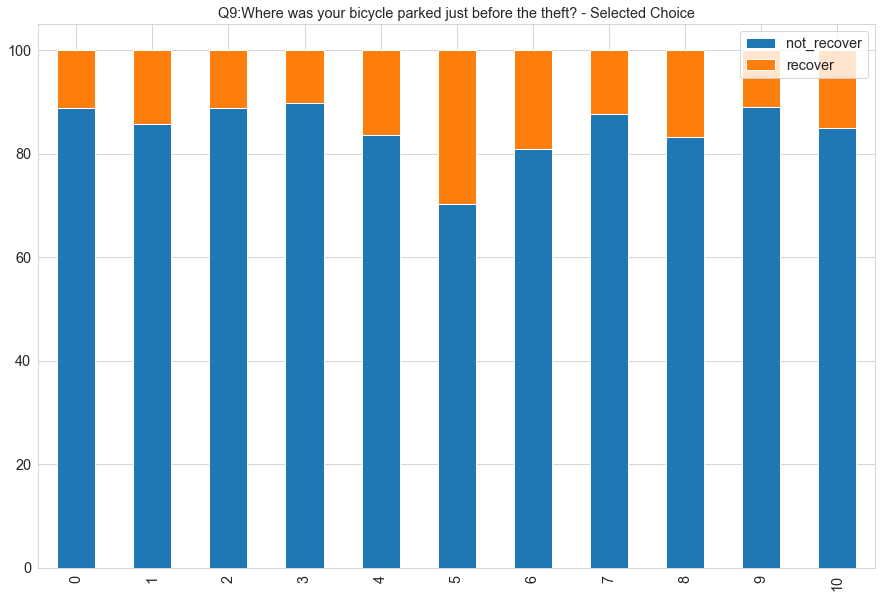

In [89]:
my_df = DataFrame(index=list(dic_recover.values()))
my_df_rel = DataFrame(index=list(dic_recover.values()))
col = 'Q9'
group_names = []
ex_2 = pre_dt.groupby(by = cols_encode[col])
for group in ex_2:
    group_names.append(group[0])
    data = group[1]
    leny = len(data)
    res = data.groupby(by ='encode_Q18').count()['index']
    my_df[group[0]] = res/len(data)*100
    my_df_rel[group[0]] = res
my_df.fillna(0,inplace=True)
my_df_rel .fillna(0,inplace=True)
my_df[group_names].T.plot.bar(stacked=True,title = col +':'+ vv[col].iloc[0])

print(tabulate(my_df_rel.astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(my_df.astype(int), headers = 'keys', tablefmt = 'pipe'))
dic_encoding[col]


### Fourteen of the 47 bikes parked inside the house/apartment before the theft were recovered, representing 29% of the total.

<AxesSubplot:title={'center':'Q11:Where did you report the bicycle or part theft? - Selected Choice'}>

╒═════════════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╕
│             │   0 │   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │   10 │   11 │   12 │   13 │   14 │
╞═════════════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╪══════╪══════╪══════╪══════╡
│ not_recover │  88 │   2 │  31 │   1 │  54 │  15 │  11 │ 271 │ 453 │  16 │  519 │   35 │   12 │   42 │    5 │
├─────────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼──────┼──────┤
│ recover     │  10 │   3 │   6 │   0 │   7 │   1 │   0 │  38 │  86 │   5 │  103 │    8 │    3 │    9 │    2 │
╘═════════════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧══════╧══════╧══════╧══════╧══════╛


TypeError: 'Styler' object is not iterable

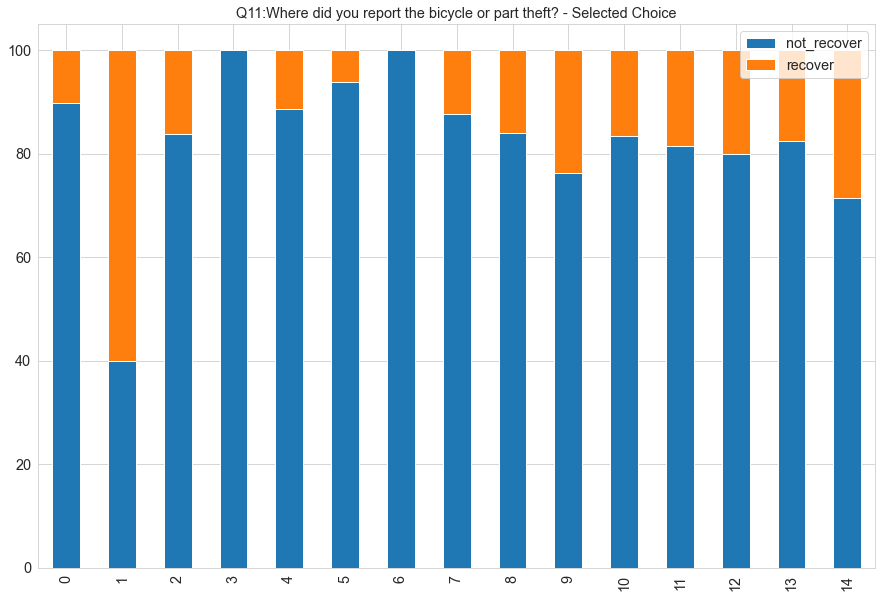

In [99]:

my_df = DataFrame(index=list(dic_recover.values()))
my_df_rel = DataFrame(index=list(dic_recover.values()))
col = 'Q11'
group_names = []
ex_2 = pre_dt.groupby(by = cols_encode[col])
for group in ex_2:
    group_names.append(group[0])
    data = group[1]
    leny = len(data)
    res = data.groupby(by ='encode_Q18').count()['index']
    my_df[group[0]] = res/len(data)*100
    my_df_rel[group[0]] = res
my_df.fillna(0,inplace=True)
my_df_rel .fillna(0,inplace=True)
my_df[group_names].T.plot.bar(stacked=True,title = col +':'+ vv[col].iloc[0])

print(tabulate(my_df_rel.astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(my_df.astype(int), headers = 'keys', tablefmt = 'pipe'))
dic_encoding[col]


### 1. There were 40% of stolen bicycles recovered by a bike registry/recovery system, but it is not enough data to be considered valid (2 out of 5).
### 2.


<AxesSubplot:title={'center':'Q15:What type of bicycle was stolen?'}>

╒═════════════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤════════╤════════╤════════╕
│             │   0 │   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │   10 │   11 │   12 │   13 │   14 │   0_a │   1_a │   2_a │   3_a │   4_a │   5_a │   6_a │   7_a │   8_a │   9_a │   10_a │   11_a │   12_a │
╞═════════════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╪══════╪══════╪══════╪══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪════════╪════════╪════════╡
│ not_recover │  87 │  83 │  81 │  78 │  93 │  85 │  81 │  87 │  83 │  33 │   84 │    0 │   83 │   82 │   71 │    14 │    50 │    40 │    11 │    42 │    17 │    90 │   499 │   461 │     1 │    325 │      0 │      5 │
├─────────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼──────┼──────┼───────┼───────┼──

{-1: nan,
 0: 'BMX ',
 5: 'Folding  ',
 8: 'Mountain  ',
 6: 'Gravel/cyclocross',
 10: 'Road',
 7: 'Hybrid/City/Dutch ',
 1: 'Cruiser ',
 2: 'Delivery/Cargo',
 11: 'Tandem ',
 4: 'Fixed gear',
 12: 'Tricycle or quadricycle',
 3: 'Don’t know/not sure',
 9: 'Recumbent '}

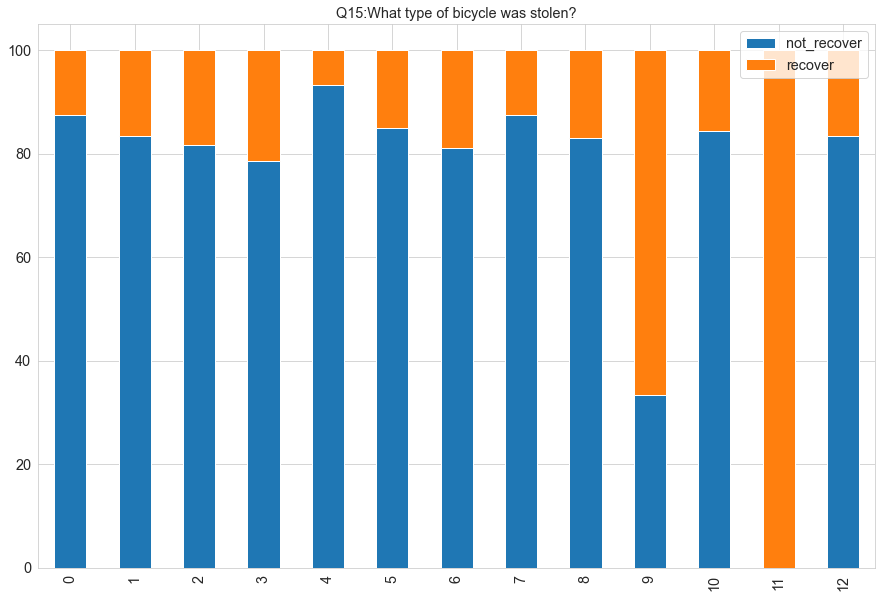

In [92]:
from tabulate import tabulate
col = 'Q15'
group_names = []
ex_2 = pre_dt.groupby(by = cols_encode[col])
for group in ex_2:
    group_names.append(group[0])
    data = group[1]
    leny = len(data)
    res = data.groupby(by ='encode_Q18').count()['index']
    my_df[group[0]] = res/len(data)*100
    real_val = str(group[0]) + '_a'
    my_df[real_val] = res
my_df.fillna(0,inplace=True)

my_df[group_names].T.plot.bar(stacked=True,title = col +':'+ vv[col].iloc[0])
print(tabulate(my_df.astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
dic_encoding[col]


### Recovery in the same and different place

Getting the data from the relevant files

In [22]:
## get location of stolen and recover places and check if it is the same
def compare_places(row):
    stolen,rec= row['stolen_bikes_place'],row['recover_bikes_place']
    stolen_list, rec_list = stolen.split(','),rec.split(',')
    # if one of the places not has information about the city compare the states
    if stolen_list[0]=='' or rec_list[0]=='':
        if stolen_list[1] ==rec_list[1]:
            return 'same'
    else:
        if stolen_list[0] ==rec_list[0]:
            return 'same'
    return 'diff'

In [1]:

rec_file = pd.read_csv(r'data/process/res_with_geo_loc_rec.csv')
rec_file['is_same'] = rec_file[['stolen_bikes_place','recover_bikes_place']].apply(compare_places,axis=1)


NameError: name 'os' is not defined

I can add to the recovery file the relevant information that distinguishes between the same location and a different location of theft and recovery using ResponseId and index columns.

In [ ]:
is_same = 'is_same'
# Add is_same to raw data
raw_data.set_index('ResponseId',inplace=True)
rec_file.set_index('ResponseId',inplace=True)
raw_data[is_same] = rec_file[is_same]

In [ ]:
raw_data.set_index('index',inplace=True)
recovery = pre_dt[pre_dt['encode_Q18'] == 'recover']
recovery.set_index('index',inplace=True)
recovery[is_same] = raw_data[is_same]
recovery.reset_index(inplace=True)


In [44]:
recovery= recovery[recovery['is_same'].notnull()]

In [ ]:
recovery.to_csv(same_diff_analysis_path)


In [41]:

cols_encode.keys()

dict_keys(['Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17'])

<AxesSubplot:title={'center':'Q10:Was your bike part of a bicycle registration and recovery system (e.g., Bike Index, a university registration program) before the theft occurred?'}>

╒══════╤═════╤═════╤═════╕
│      │   0 │   1 │   2 │
╞══════╪═════╪═════╪═════╡
│ same │   6 │ 129 │  91 │
├──────┼─────┼─────┼─────┤
│ diff │   0 │  23 │  28 │
╘══════╧═════╧═════╧═════╛
|      |   0 |   1 |   2 |
|:-----|----:|----:|----:|
| same | 100 |  84 |  76 |
| diff |   0 |  15 |  23 |


{1: 'No ', -1: nan, 2: 'Yes ', 0: 'Don’t know/not sure'}

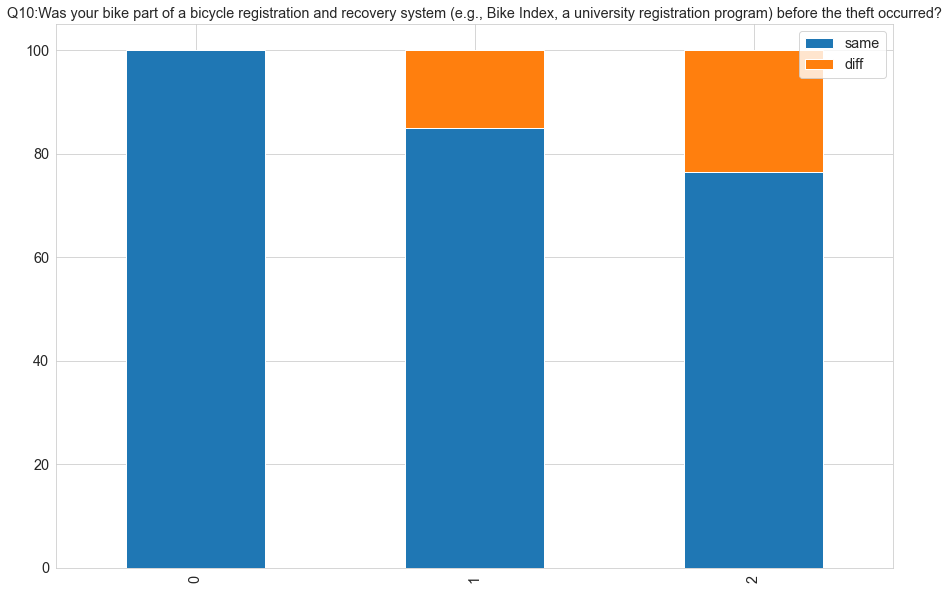

In [54]:
from tabulate import tabulate
my_res = ['same','diff']
my_df = DataFrame(index=my_res)
my_df_rel = DataFrame(index=my_res)

col = 'Q10'
group_names = []
ex = recovery.groupby(by = cols_encode[col])
for group in ex:
    group_names.append(group[0])
    data = group[1]
    leny = len(data)
    res = data.groupby(by ='is_same').count()['index']
    my_df[group[0]] = res/len(data)*100
    my_df_rel[group[0]] = res
my_df.fillna(0,inplace=True)
my_df_rel .fillna(0,inplace=True)
my_df[group_names].T.plot.bar(stacked=True,title = col +':'+ vv[col].iloc[0])

print(tabulate(my_df_rel.astype(int), headers = 'keys', tablefmt = 'fancy_grid'))
print(tabulate(my_df.astype(int), headers = 'keys', tablefmt = 'pipe'))
dic_encoding[col]



In [ ]:
c, p, dof, expected = chi2_contingency(fo_hi_square_test)

In [64]:
c, p, dof, expected

(19.098560566621778,
 0.059347098487715494,
 11,
 array([[ 1.63176895,  7.34296029,  7.34296029,  2.44765343,  2.44765343,
          2.44765343, 17.13357401, 58.74368231, 76.69314079,  1.63176895,
         47.32129964,  0.81588448],
        [ 0.36823105,  1.65703971,  1.65703971,  0.55234657,  0.55234657,
          0.55234657,  3.86642599, 13.25631769, 17.30685921,  0.36823105,
         10.67870036,  0.18411552]]))

In [76]:
c, p, dof, expected = chi2_contingency(final)
c, p, dof, expected

(0.08450690516204326,
 0.9999999999072098,
 11,
 array([[0.00162934, 0.00733203, 0.00733203, 0.00244401, 0.00244401,
         0.00244401, 0.01710808, 0.05865627, 0.07657902, 0.00162934,
         0.04725089, 0.00081467],
        [0.00722022, 0.03249097, 0.03249097, 0.01083032, 0.01083032,
         0.01083032, 0.07581227, 0.2599278 , 0.33935018, 0.00722022,
         0.20938628, 0.00361011]]))